### MEAT ENTHUSIASTS

#### Twitter Giveaway Contest

#### Group Members
##### Efe Hüseyin Yılmaz   (Mechatronics Engineering)
##### Onur Alp Kayıkçı     (Mechatronics Engineering)
##### Furkan Kırmızıgül    (Mechatronics Engineering)

In [1]:

import pandas as pd
import tweepy

consumer_key="TnsX35M2vVMjOjMD5y4rUB08v"
consumer_secret="81iObHjbYV5bX0bZWR8N2rseLM9BFc0NX64gPmtTkYvdHmSpvw"
acc_token="970056486624821249-3Jj6LKihlheLyVaTdTFvMBMpwJtDD9s"
acc_secret="EX2kSRtLspo4aGRFGt9nmmdMI50NfW0uygENDOH6EzVdQ"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(acc_token, acc_secret)
api = tweepy.API(auth)

# START

### Getting Followers

In [2]:
username="sprezzaturaf"

In [3]:
me = api.get_user(username)
my_name =me.name
my_followers_count = me.followers_count
my_friends_count =me.friends_count

In [4]:
mecl=( my_name,my_followers_count,my_friends_count)
merw =["NAME","FOLLOWERS_COUNT","FRIENDS_COUNT"]
me_frame = pd.DataFrame(mecl,merw)
me_frame =pd.DataFrame.transpose(me_frame)
me_frame

,NAME,FOLLOWERS_COUNT,FRIENDS_COUNT
0,FK,39,129


In [5]:

my_follower_full=[]
for followers in tweepy.Cursor(api.followers,(username)).items(40):
     my_follower_full.append(followers)

In [6]:
my_follower_ids=[]
my_follower_names=[]
my_follower_followers=[]
my_follower_friends=[]

for follower in my_follower_full:
    my_follower_ids.append(follower.id)
    my_follower_names.append(follower.name)
    my_follower_followers.append(follower.followers_count)
    my_follower_friends.append(follower.friends_count)
    

In [7]:
rws = ["ID","Name","Follower_count","Friends_count"]
clms= [my_follower_ids,my_follower_names,my_follower_followers,my_follower_friends]

followers_data = pd.DataFrame(clms,rws)
followers_data =pd.DataFrame.transpose(followers_data)
followers_data =followers_data.set_index("ID")
followers_data

,Name,Follower_count,Friends_count
ID,,,
1328275529334710272,Efe,1,10
806927370041049088,Lara,230,180
2411001317,Bartu Akit,4,24
439501816,Onur Kayikci,96,70
1192730257163464705,Zeynep Kırmızıgül,4,22
1191268551912574976,_duygp,14,29
1158886557111279617,c9rvis,3,39
245103540,Miray,156,124
1125542895598153728,Selin Atalay,86,168


In [8]:
sum(my_follower_followers)

8463

api.followers_ids(username)

### We can create our status update for giveaway using jupyter (optional)

Status_Update = input("Please enter the tweet for giveaway contest ")

new_status = api.update_status (Status_Update)

St_id= new_status.id

## Getting giveaway tweet data

In [9]:
St_id2 =1338582220278276104

In [10]:
status = api.get_status (St_id2)

In [11]:
rw= ["TEXT", "USERNAME", "RT", "FV","ID"]
cl = [status.text,status.user.name, status.retweet_count, status.favorite_count,status.id,] 
df = pd.DataFrame(cl,rw)
df = pd.DataFrame.transpose(df)
df

,TEXT,USERNAME,RT,FV,ID
0,Short story https://t.co/G2Ycafd44W,FK,3,18,1338582220278276104


### API Usage for retweeters
#### Even if we use Cursor for api.retweeters the limit does not allow us to reach more than 100 retweeter id

##### giveaway_retweeters =[]
##### giveaway_retweeters2= []
##### for user_id in (tweepy.Cursor(api.retweeters,(St_id2)).items(1000)):
   ##### giveaway_retweeters.append (user_id)
    
   ##### giveaway_retweeters

##### retweeter_list=api.retweeters(St_id2)
##### retweeter_list

## So we search the tweet as text in twitter and get more retweeters

In [12]:
text_tweet= status.text
text_tweet ="RT " + text_tweet

In [13]:
status_doc=[]
for status in tweepy.Cursor(api.search, q=text_tweet, lang='en',per_page=10).items(10):
      status_doc.append(status)

In [14]:
status_text=[]
status_retweeters_username=[]
status_retweeters_id=[]


for status in status_doc:
    status_text.append(status.text)
    status_retweeters_username.append(status.user.name)
    status_retweeters_id.append(status.user.id)
   
    
status_rows = [status_text,status_retweeters_username,status_retweeters_id] 
status_columns =["TEXT","USERNAME","ID"]
retweeters_table= pd.DataFrame(status_rows,status_columns)
retweeters_table= pd.DataFrame.transpose(retweeters_table)
retweeters_table

,TEXT,USERNAME,ID
0,RT @sprezzaturaf: Short story https://t.co/G2Y...,Efe,1328275529334710272
1,RT @sprezzaturaf: Short story https://t.co/G2Y...,Onur Kayikci,439501816
2,RT @sprezzaturaf: Short story https://t.co/G2Y...,Alevörtenhuni,1196068889639165958


In [15]:
status_retweeters_id

[1328275529334710272, 439501816, 1196068889639165958]

## Checking for retweeters in follower list

In [16]:
retweeters_following = set(status_retweeters_id).intersection(my_follower_ids)
retweeters_following = list(retweeters_following)

In [17]:
retweeters_following

[1328275529334710272, 439501816]

In [18]:
retweeters_not_following = set(status_retweeters_id).difference(my_follower_ids)
retweeters_not_following = list(retweeters_not_following)

In [19]:
retweeters_not_following

[1196068889639165958]

### Choosing a random user in eliminated retweeter list

In [20]:
import random
Chosen_ID = random.choice(retweeters_following)
Chosen_ID

1328275529334710272

### Getting the info of winner 

In [21]:
winner = api.get_user(Chosen_ID)

In [22]:
dataframecols=( winner.name,winner.screen_name,winner.followers_count)
rw =["WINNER NAME","USERNAME","FOLLOWER COUNT"]
df3 = pd.DataFrame(dataframecols,rw)
df3 =pd.DataFrame.transpose(df3)
df3

,WINNER NAME,USERNAME,FOLLOWER COUNT
0,Efe,Efe25174342,1


In [ ]:
import webbrowser
webbrowser.open("https://twitter.com/"+winner.screen_name)

## Analysis

In [23]:

import matplotlib.pyplot as plt


In [24]:
tweet_reach_base= followers_data.Follower_count.sort_values( ascending=True)

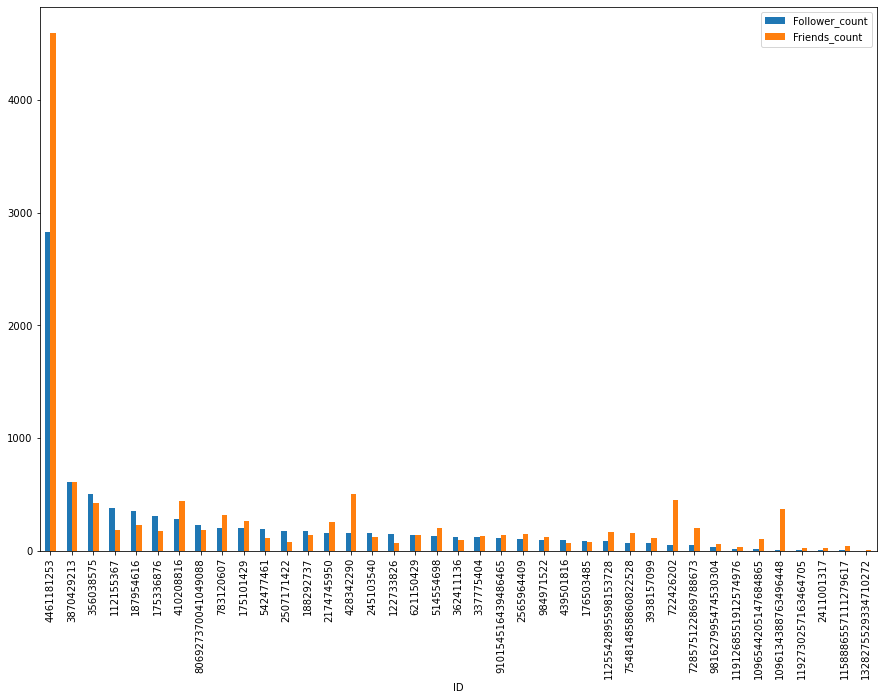

In [26]:
fd3=followers_data.sort_values(by=['Follower_count'], ascending=False)
fd3.plot(kind='bar',figsize=(15, 10))

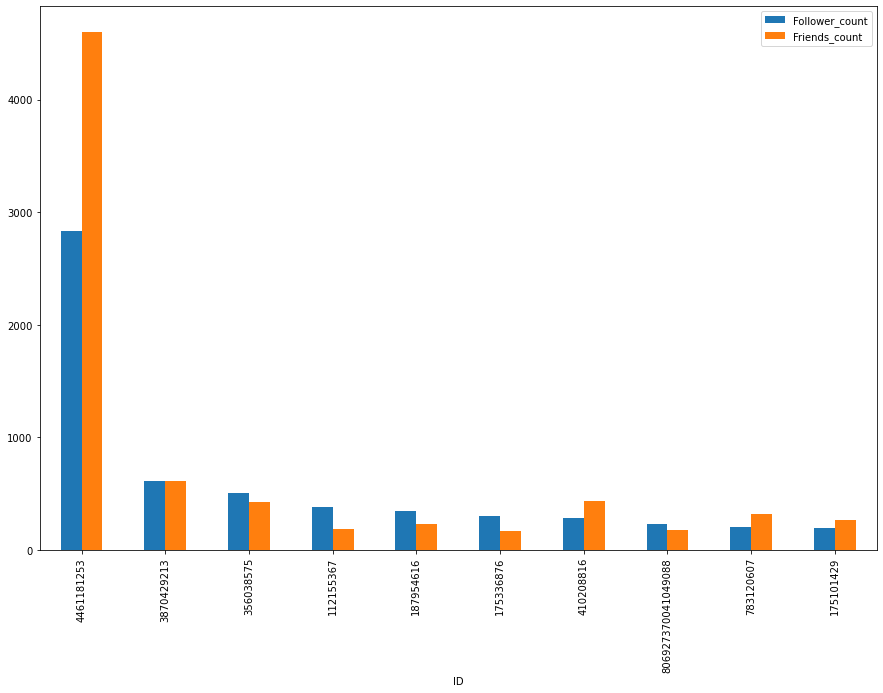

In [28]:
fd3=followers_data.sort_values(by=['Follower_count'], ascending=False).head(10)
fd3.plot(kind='bar',figsize=(15, 10))

## User count that we reached with retweeters

In [29]:
retweeters = api.lookup_users(status_retweeters_id)

In [30]:
follower_counts_of_retweeters=[]
friends_counts_of_retweeters=[]
ids_of_retweeters=[]  

for retweeters1 in retweeters:
    follower_counts_of_retweeters.append(retweeters1.followers_count)
    friends_counts_of_retweeters.append(retweeters1.friends_count)
    ids_of_retweeters.append(retweeters1.id)

In [31]:
follower_counts_of_retweeters

[1, 96, 10]

In [32]:
friends_counts_of_retweeters

[10, 70, 120]

In [33]:
ids_of_retweeters

[1328275529334710272, 439501816, 1196068889639165958]

In [34]:
retweeters_ffr  = ["ID","follower_counts","friends_counts"]
retweeters_ffc = [ids_of_retweeters,follower_counts_of_retweeters,friends_counts_of_retweeters]

retweeters_ff = pd.DataFrame(retweeters_ffc,retweeters_ffr)
retweeters_ff  =pd.DataFrame.transpose(retweeters_ff )
retweeters_ff =retweeters_ff.set_index("ID")
retweeters_ff

,follower_counts,friends_counts
ID,,
1328275529334710272,1,10
439501816,96,70
1196068889639165958,10,120


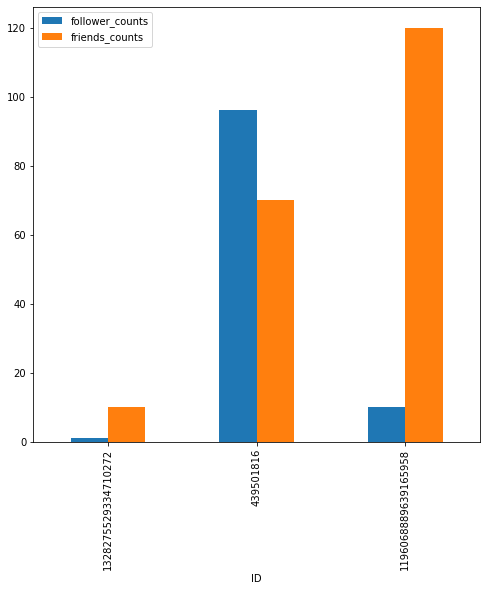

In [38]:
retweeters_ff.plot(kind='bar',figsize=(8, 8))

In [39]:
overall_retweeters_reach = sum(follower_counts_of_retweeters)+my_followers_count

In [40]:
overall_retweeters_reach

146

In [41]:
overallcl=['Totalreach','MyFollovers']
overallrw=[overall_retweeters_reach,my_followers_count]
overall = pd.DataFrame(overallrw,overallcl)
overall  =pd.DataFrame.transpose(overall )
overall.index.name='Users'


In [42]:
overall

,Totalreach,MyFollovers
Users,,
0,146,39


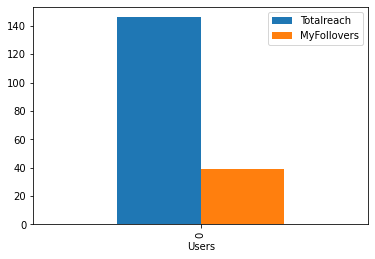

In [43]:
overall.plot(kind='bar')

In [44]:
rt_reach =sum(follower_counts_of_retweeters)

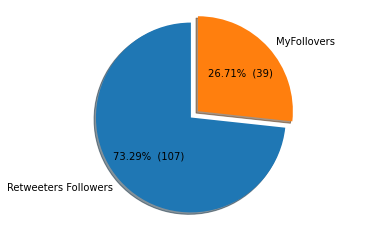

In [45]:
labels = 'Retweeters Followers', 'MyFollovers', 
sizes = [rt_reach, my_followers_count, ]
explode = (0, 0.1 )

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(sizes)/100) , shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

In [46]:
f1=len(retweeters_following)
f2=len(retweeters_not_following)

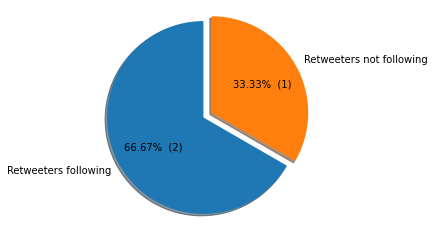

In [47]:
labels = 'Retweeters following', 'Retweeters not following', 
sizes = [f1, f2, ]
explode = (0, 0.1 ) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(sizes)/100), shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()